# SVM creditcard demo in class

import the data

In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Missing data

In [4]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [5]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [6]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [7]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [8]:
len(df)

30000

In [9]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE']!= 0)]

In [10]:
len(df_no_missing)

29932

Downsampling

In [11]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [12]:
len(df_no_default)

23301

In [13]:
len(df_default)

6631

In [14]:
from sklearn.utils import resample

In [15]:
df_no_default_ds = resample(df_no_default, replace=False, n_samples=1000)

In [16]:
df_default_ds = resample(df_default, replace=False, n_samples=1000)

In [17]:
len(df_default_ds)

1000

In [18]:
df_downsample = pd.concat([df_no_default_ds, df_default_ds])
len(df_downsample)

2000

setup for the machine learning

In [19]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
y = df_downsample['DEFAULT'].copy()

In [20]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20285,160000,2,3,1,51,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20187,500000,2,1,2,33,-1,-1,-1,-1,-1,...,249,99,-150,-150,2655,249,99,150,0,0
505,160000,1,1,2,35,-1,-1,-1,-1,-1,...,396,0,792,1220,396,396,0,793,1220,0
25648,450000,2,2,1,42,0,0,0,0,0,...,18748,24711,33111,50885,7272,8764,9823,11123,20274,5374
913,30000,1,3,1,45,0,0,2,0,0,...,23180,22000,22000,0,7900,0,0,0,0,0


In [21]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
20285,160000,2,3,51,-2,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,True,False,False
20187,500000,2,1,33,-1,-1,-1,-1,-1,-2,...,-150,2655,249,99,150,0,0,False,True,False
505,160000,1,1,35,-1,-1,-1,-1,-1,-1,...,1220,396,396,0,793,1220,0,False,True,False
25648,450000,2,2,42,0,0,0,0,0,0,...,50885,7272,8764,9823,11123,20274,5374,True,False,False
913,30000,1,3,45,0,0,2,0,0,0,...,0,7900,0,0,0,0,0,True,False,False


In [22]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

In [23]:
X_encoded.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
20285,160000,51,-2,-2,-2,-2,-2,-2,0,0,...,True,False,False,True,False,False,False,True,False,False
20187,500000,33,-1,-1,-1,-1,-1,-2,249,2655,...,True,True,False,False,False,False,False,False,True,False
505,160000,35,-1,-1,-1,-1,-1,-1,396,396,...,False,True,False,False,False,False,False,False,True,False
25648,450000,42,0,0,0,0,0,0,7669,13267,...,True,False,True,False,False,False,False,True,False,False
913,30000,45,0,0,2,0,0,0,17187,24045,...,False,False,False,True,False,False,False,True,False,False


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1)

In [25]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

carry out SVM

In [26]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

In [27]:
y_pred = clf_svm.predict(X_test_scaled)

test out SVM

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[76, 21],
       [51, 52]], dtype=int64)

the model thinks 51+76 people will pay on time, 76 people did pay on time, and 51 people didn't

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import plot_confusion_matrix

C:\Users\sahua\miniconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


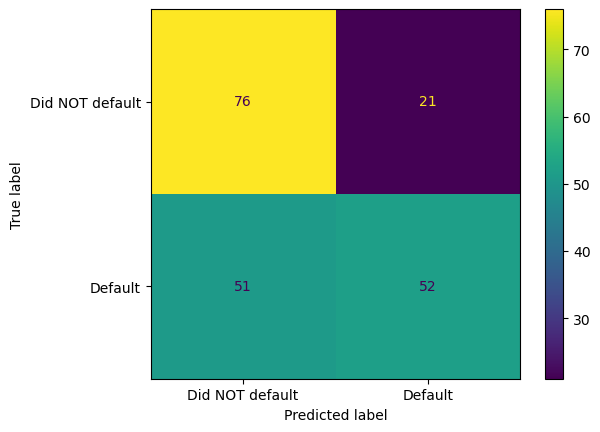

In [31]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels=['Did NOT default', "Default"])

Optimize gamma and C

In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = [
    {'C': [0.1, 1, 10],
    'gamma':['scale', 0.01, 0.1, 1, 10, 100],
    'kernel':['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


Redo SVM

In [35]:
clf_svm = SVC(C=1, gamma=0.01, kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01)

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[76, 21],
       [51, 52]], dtype=int64)